In [107]:
import numpy as np 
import pandas as pd
import glob 
import os
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

path = 'boston-housing-dataset'
X_test = pd.read_csv(os.path.join(path,'housing_X_test.csv'))
X_train = pd.read_csv(os.path.join(path,'housing_X_train.csv'))
y_train = pd.read_csv(os.path.join(path,'housing_y_train.csv'))
y_test = pd.read_csv(os.path.join(path,'housing_y_test.csv'))

In [108]:
# MSE
def MSE(y,y_pred):
    """mean squared error"""
    return ((y-y_pred)**2).mean(axis=0)[0]

class Standardize(object):

    def fit(self, X,y):
        """Fit standard scaler"""
        self.x_bar = np.mean(X, axis = 0).values
        self.std = np.std(X, axis = 0).values
        self.y_bar = np.mean(y, axis = 0).values
    
    def transformX(self, X): 
        """Standardize input"""
        return (X.values - self.x_bar)/self.std
    
    def transformy(self, y):
        """Centering output"""
        return y - self.y_bar
    
class RidgeRegression(object):
    
    def __init__(self, λ=0.1):
        """set lambda"""
        self.λ = λ

    def fit(self, X, y):
        """fit ridge"""
        # solve    
        self.w =  np.linalg.solve(X.T.dot(X) + self.λ * np.eye(X.shape[1]), X.T.dot(y))
        #self.w = np.linalg.solve(X.T * X + self.λ * np.eye(X.shape[1]), X.T * y)
        
    def predict(self, X):
        """predict"""
        return scaler.y_bar + X.dot(self.w)  

In [109]:
scaler = Standardize()
scaler.fit(X_train,y_train)

X_train = pd.DataFrame(scaler.transformX(X_train))
X_test = pd.DataFrame(scaler.transformX(X_test))
y_train_centered = pd.DataFrame(scaler.transformy(y_train))
y_test_centered = pd.DataFrame(scaler.transformy(y_train))


print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(305, 13) (305, 1)
(199, 13) (199, 1)


In [110]:
#test set
rr = RidgeRegression(λ=10)
rr.fit(X_train,y_train_centered)
pred = rr.predict(X_test) 
print('mse: ',MSE(pred.values, y_test.values))

mse:  243.7025963814039


In [111]:
# cross-validated init 
λ_i = [i*0.01 for i in range(10,3001)]
λ_accu = {}

# CV .....
CV = []
for i in range(0,10):
    CV.append([x for x in range(i*30,i*30+30)])
for i in range(300,305):
    CV[9].append(i)

In [112]:
# cross validate result
for λ in λ_i:
    accuracy = []
    for val_set in range(0,10):
        validation = X_train.index.isin(CV[val_set])
        X = X_train.iloc[~validation]
        y = y_train.iloc[~validation]
        X_t = X_train.iloc[validation]
        y_t = y_train.iloc[validation]
        
        rr = RidgeRegression(λ)
        rr.fit(X,y)
        y_pred = rr.predict(X_t)

        y_err = MSE(y_pred.values,y_t.values)
        accuracy.append(y_err)
    λ_accu.setdefault(λ,np.mean(accuracy))
    

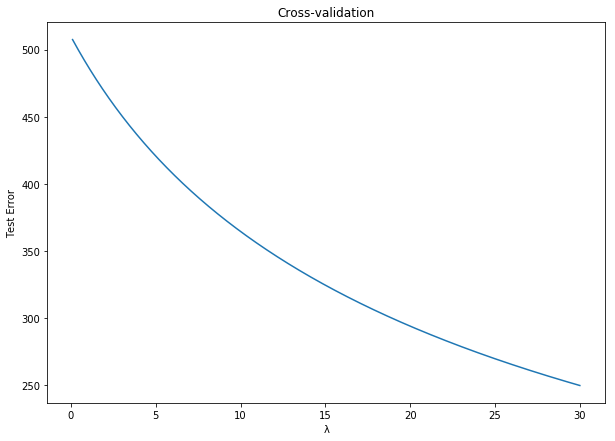

In [113]:
plt.figure(figsize=(10,7))
plt.plot(λ_accu.keys(), λ_accu.values())
plt.title('Cross-validation')
plt.xlabel('λ')
plt.ylabel('Test Error')
plt.show()

In [114]:
best = min(λ_accu, key=λ_accu.get)
print('Best Lambda: ',best)
rr = RidgeRegression(best)
rr.fit(X_train,y_train)
y_pred = rr.predict(X_test)
y_err = MSE(y_pred.values,y_test.values)
print('Test Error: ',y_err)

Best Lambda:  30.0
Test Error:  150.34760918384004
